In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [159]:
df_test=pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')

In [160]:
df=pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')


In [202]:
def preproc(df,train=True):
    result_df=df.copy()
    result_df['IMT']=result_df["weight(kg)"]/((result_df['height(cm)']*result_df['height(cm)'])*100)
    #result_df["HDL/LDL"]=result_df['HDL']/df["LDL"]
    #result_df=result_df.drop(["HDL","LDL"],axis=1)
    result_df['male']=0
    result_df.loc[(result_df['height(cm)']>174)  ,'male']=1
    if train:
        result_df=result_df.drop(["smoking","id"],axis=1)
    else:
         result_df=result_df.drop(["id"],axis=1)
    return result_df

In [233]:
features=df.columns.to_list()
important_clf=RandomForestClassifier(n_estimators=500)


In [236]:
def get_importance(clf_1,printed=False):
    hash_imp={}
    for name,score in zip(features,clf_1.feature_importances_):
        hash_imp[name]=score
    sorted(hash_imp.items(), key=lambda x:x[1])
    return hash_imp
    

In [203]:
#df['IMT']=df["weight(kg)"]/((df['height(cm)']*df['height(cm)'])*100)
#df["HDL/LDL"]=df['HDL']/df["LDL"]

In [239]:
df['male']=0

In [240]:
df.loc[(df['height(cm)']>174)  ,'male']=1

In [243]:
df.loc[df['male']==1]['smoking'].value_counts(normalize=True)

1    0.647125
0    0.352875
Name: smoking, dtype: float64

In [244]:
df.loc[df['male']==0]['smoking'].value_counts(normalize=True)

0    0.620951
1    0.379049
Name: smoking, dtype: float64

In [242]:
df.corr()['smoking'].sort_values()

HDL                   -0.271186
age                   -0.206033
LDL                   -0.072285
Cholesterol           -0.051896
hearing(left)         -0.038219
hearing(right)        -0.036858
Urine protein         -0.028548
id                    -0.000632
systolic               0.058642
AST                    0.059394
fasting blood sugar    0.096534
eyesight(left)         0.100420
dental caries          0.106636
relaxation             0.109501
eyesight(right)        0.109781
ALT                    0.163016
male                   0.222957
waist(cm)              0.262715
serum creatinine       0.272979
Gtp                    0.305561
triglyceride           0.331975
weight(kg)             0.351748
height(cm)             0.447111
hemoglobin             0.450679
smoking                1.000000
Name: smoking, dtype: float64

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_df=preproc(df)
#std=StandardScaler()
#train_df=std.fit_transform(train_df)

In [210]:
X_train,X_val,y_train,y_val=train_test_split(train_df,df['smoking'],stratify=df['smoking'],random_state=42)

In [211]:
X_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,IMT,HDL/LDL
154078,55,155,55,69.0,0.9,0.7,1,1,113,67,...,89,13.0,1,0.7,24,17,18,0,0.000023,0.545455
7433,55,165,60,74.5,1.0,1.2,2,2,122,68,...,96,14.0,2,1.0,23,14,17,1,0.000022,0.348837
27495,50,150,45,70.0,0.7,1.0,1,1,98,58,...,43,13.4,1,0.7,27,26,17,0,0.000020,0.814815
126404,35,180,90,93.0,1.0,1.2,1,1,115,75,...,145,16.1,1,1.0,29,57,54,0,0.000028,0.380165
61128,35,175,95,101.0,1.5,1.5,1,1,126,78,...,134,15.3,1,0.9,33,55,63,1,0.000031,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89553,60,165,60,84.0,0.9,0.9,1,1,130,80,...,168,15.9,1,0.8,28,30,121,1,0.000022,0.561798
83321,50,150,40,65.0,1.2,1.2,1,1,97,60,...,82,13.3,1,0.5,18,13,8,0,0.000018,0.550562
151730,55,170,75,91.0,1.2,1.0,1,1,140,90,...,171,16.3,1,1.0,25,24,44,0,0.000026,0.400000
146649,60,160,65,89.0,0.9,1.0,1,1,132,81,...,56,13.0,1,0.9,47,38,57,0,0.000025,0.451128


<Axes: >

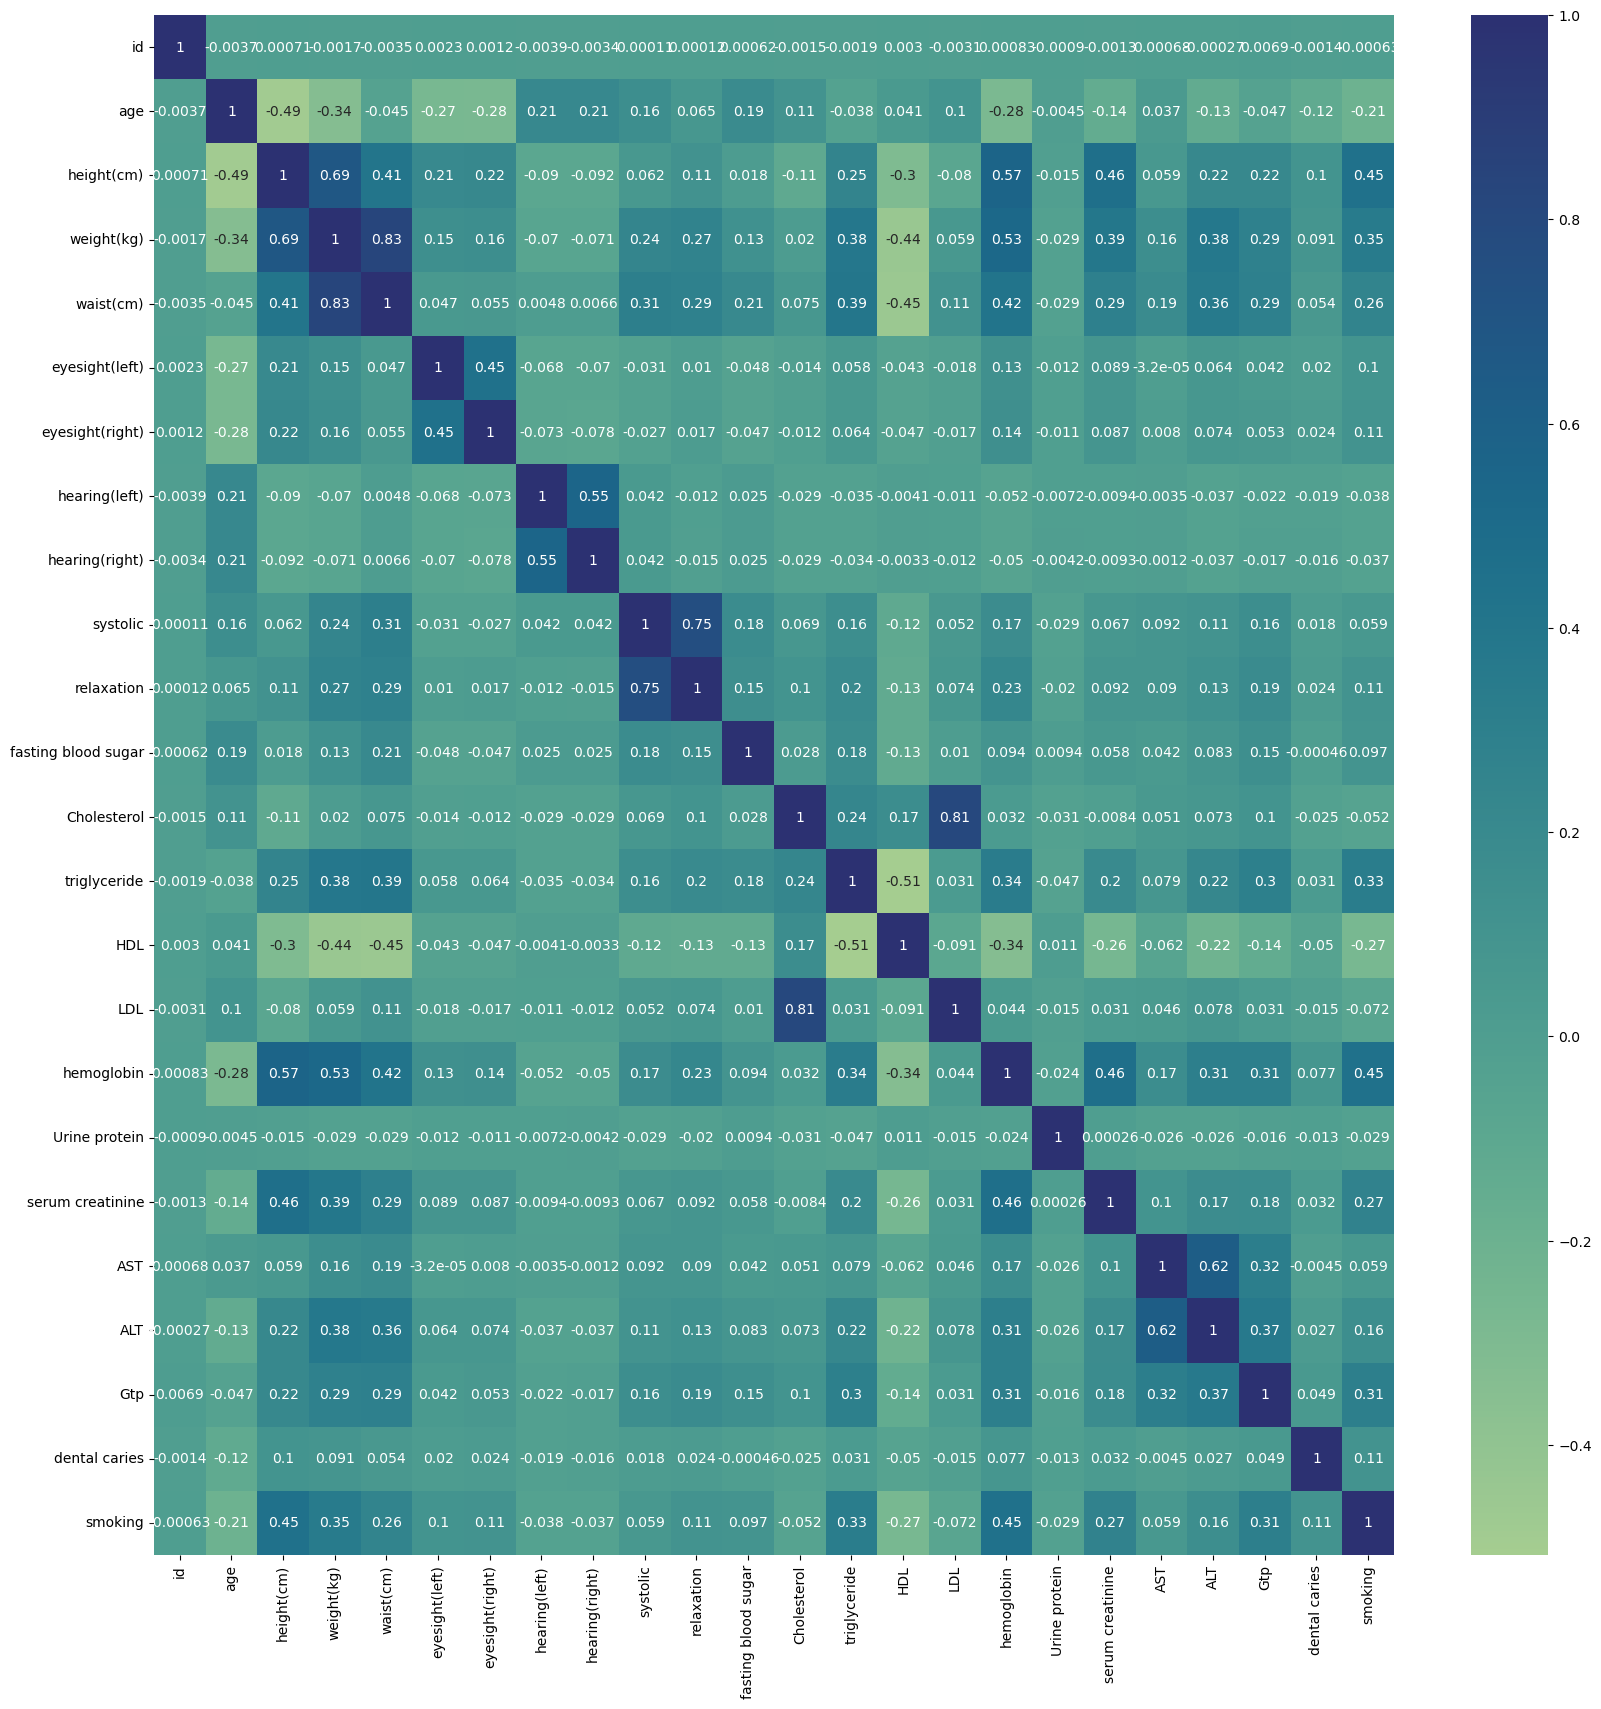

In [212]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(df.corr(),annot=True,cmap="crest")

In [213]:
y_train

154078    0
7433      0
27495     0
126404    0
61128     0
         ..
89553     1
83321     0
151730    0
146649    0
132566    0
Name: smoking, Length: 119442, dtype: int64

In [218]:
from sklearn.linear_model import LinearRegression,Lasso,RidgeClassifier,SGDClassifier,LogisticRegression,Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

roc_auc_score(y_val,lin_reg.predict(X_val))

0.8290675056185564

In [234]:
important_clf.fit(X_train,y_train)
importance_df=pd.DataFrame()
importance_df['smoking']=important_clf.predict_proba(X_val)[:,1]

In [238]:
no_imp=get_importance(important_clf,printed=True)
sorted(no_imp.items(), key=lambda x:x[1])

[('hearing(left)', 0.0015563870500056212),
 ('eyesight(right)', 0.0015630249748572272),
 ('HDL', 0.003967633671586057),
 ('AST', 0.006868244953491332),
 ('waist(cm)', 0.024924820101853127),
 ('eyesight(left)', 0.025252227977351695),
 ('ALT', 0.033189005190661106),
 ('systolic', 0.038501894527781855),
 ('id', 0.03915867567810848),
 ('hemoglobin', 0.04042415872350049),
 ('height(cm)', 0.04109411697359947),
 ('hearing(right)', 0.041136492467136944),
 ('LDL', 0.042503727303299224),
 ('relaxation', 0.043621257486210686),
 ('Urine protein', 0.04563407723317907),
 ('weight(kg)', 0.04655561977927037),
 ('Gtp', 0.052599600641537556),
 ('fasting blood sugar', 0.052865077696663855),
 ('Cholesterol', 0.08477994886794143),
 ('serum creatinine', 0.10095060739498071),
 ('age', 0.10429710038554282),
 ('triglyceride', 0.12855630092144077)]

In [219]:
from xgboost import XGBClassifier

In [220]:
ridge_clf=RidgeClassifier(alpha=0.1,)
ridge_clf.fit(X_train,y_train)
roc_auc_score(y_val,ridge_clf.predict(X_val))



0.748066794597493

In [221]:
def test_thr(df,y_true,thrs):
    best_thr=0
    best_score=0
    score=0
    for i in thrs:
        df[df['smoking']>=i]=1
        df[df['smoking']<i]=0
        score=roc_auc_score(y_true,df)
        if score>best_score:
            best_score=score
            best_thr=i
    return best_thr,best_score

In [222]:
grid_cv=GridSearchCV(estimator=ridge_clf, cv=3,param_grid={'alpha': np.arange(0.1,3,0.05)},scoring="roc_auc")
grid_cv.fit(train_df,df['smoking'])
grid_cv.best_score_

0.8320413154023095

In [223]:
xgb=XGBClassifier(n_estimators=500,max_depth=3,objective= "binary:logistic")
xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [225]:
result=xgb.predict_proba(X_val)
result
test=pd.DataFrame()
test['smoking']=result[:,1]
roc_auc_score(y_val,test['smoking'])
#thr,score=test_thr(test,y_val,np.arange(0,1,0.05))

0.8657831295439298

In [226]:
xgb.fit(train_df,df['smoking'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [145]:
X_test=df_test.copy()

X_test['IMT']=X_test["weight(kg)"]/(X_test['height(cm)']*X_test['height(cm)'])
X_test["HDL/LDL"]=X_test['HDL']/X_test["LDL"]

In [146]:
X_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,IMT,HDL/LDL
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,115,14.2,1,0.9,19,25,32,0,0.002571,0.426087
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,104,13.0,1,1.1,20,12,24,0,0.002344,0.336538
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,88,15.4,1,1.4,38,60,36,0,0.002422,0.443182
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,128,14.5,1,0.6,25,18,10,1,0.001953,0.585938
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,123,16.5,1,1.0,30,39,27,1,0.002595,0.317073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,149,16.4,1,1.1,24,31,28,0,0.002204,0.395973
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,100,16.0,2,1.0,25,31,38,0,0.002941,0.440000
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,142,15.9,1,0.8,33,32,24,1,0.002941,0.373239
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,103,13.9,1,0.6,42,36,32,0,0.002344,0.533981


In [147]:
X_test=X_test.drop(["id"],axis=1)

In [148]:
result=xgb.predict_proba(X_test)
result
test=pd.DataFrame()
test['id']=df_test['id']
test['smoking']=result[:,1]


In [149]:
test

,id,smoking
0,159256,0.718738
1,159257,0.410437
2,159258,0.317570
3,159259,0.042962
4,159260,0.582719
...,...,...
106166,265422,0.791376
106167,265423,0.528537
106168,265424,0.657072
106169,265425,0.074043


In [68]:
roc_auc_score(y_val,result[:,1])

0.8663265070240349

In [71]:
sgd_clf=SGDClassifier(penalty='l1',n_iter_no_change=15,max_iter=2000)
sgd_clf.fit(X_train,y_train)
roc_auc_score(y_val,sgd_clf.predict(X_val))

0.7229927225649401

In [73]:
result


array([[0.21393979, 0.7860602 ],
       [0.49577278, 0.5042272 ],
       [0.8293129 , 0.17068708],
       ...,
       [0.3999334 , 0.6000666 ],
       [0.7132685 , 0.28673148],
       [0.6834661 , 0.3165339 ]], dtype=float32)

In [150]:
test.to_csv("result_5.csv",index=False)